# IS 4487 Lab 13

## Outline

What do you need to know for this module's project?

1.  Use the model to predict on a new dataset (without the target), then use these predictions to identify those who should be called--a contact list.
2.  Make a recommendation to the Director of Sales based on your analytic work.
3.  Compare the output of the Classification Tree to an Ensemble method (XGBoost)

**NOTE:** For the module 7 project you will predict answering for prospective customers (who have not yet been called). Consequently, the assignment requires an additional dataset, customer_data.csv, that you will need to download and move into your project folder.   

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab13_megatelco_compare_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

#Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [45]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the Megatelco dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe


In [46]:
df = pd.read_csv('megatelco_leave_survey.csv')
df.describe()

,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,14996.000000,14999.000000,14999.000000
mean,241989.140476,153.522502,37.522035,4202.624442,135.622041,8.771616e+05,795.146810,10.568685,9.731515,11859.749517
std,109603.370138,113.018111,28.046409,2202.763649,48.831061,2.870316e+05,1235.785429,8.402100,5.195150,6812.842446
min,-65000.000000,0.000000,0.000000,400.000000,52.000000,-4.630000e+02,215.000000,0.000000,1.000000,2.000000
25%,147822.000000,54.000000,12.000000,2294.000000,93.000000,6.444405e+05,498.000000,3.000000,5.000000,6137.000000
50%,241656.000000,151.000000,35.000000,4223.000000,135.000000,8.764130e+05,778.000000,9.000000,10.000000,11760.000000
75%,336456.500000,242.000000,62.000000,6080.000000,178.000000,1.098834e+06,1064.000000,17.000000,14.000000,17396.000000
max,432000.000000,380.000000,89.000000,8000.000000,220.000000,1.456389e+06,125000.000000,35.000000,19.000000,25354.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts?

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [47]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna()

df_clean.describe()

,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,10412.000000,10412.000000,10412.000000,10412.000000,10412.000000,1.041200e+04,10412.000000,10412.000000,10412.000000,10412.000000
mean,242068.987706,153.847003,37.472436,4195.399827,135.500000,8.758348e+05,607.473492,10.571072,9.747503,11839.793988
std,109041.788157,113.013727,28.015291,2205.189091,48.916131,2.868363e+05,225.506388,8.444673,5.180381,6805.159729
min,52491.000000,0.000000,0.000000,400.000000,52.000000,3.202380e+05,215.000000,0.000000,1.000000,2.000000
25%,148548.000000,55.000000,12.000000,2290.750000,93.000000,6.447640e+05,413.000000,3.000000,5.000000,6070.750000
50%,241663.000000,151.000000,35.000000,4206.500000,135.000000,8.730785e+05,608.000000,9.000000,10.000000,11743.000000
75%,335660.500000,242.000000,62.000000,6079.250000,178.000000,1.098298e+06,802.000000,17.000000,14.000000,17330.500000
max,431916.000000,380.000000,89.000000,8000.000000,220.000000,1.456389e+06,999.000000,35.000000,19.000000,25354.000000


# Standardize attributes

- Convert "college" to 0,1
- Convert reported_satisfaction to 1,2,3
- Convert reported_usage_level to 1,2,3
- Convert considering_change_of_plan to 0,1
- Convert leave to 0,1

I'm going to leave the "leave" variable in place, just in case I need the original value

In [48]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1"
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean['college'] = df_clean['college'].astype('int')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('int')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('int')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('float')

#Add new field with binary value for leave
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')
df_clean['leave_flag'] = df_clean['leave_flag'].astype('bool')

df_clean.head(10)

,college,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,operating_system,leave_flag
0,1,403137,70,0,6605,199,841317,653,5.0,8,1,1,1.0,LEAVE,8183,Android,True
7,1,131230,0,0,4489,89,613744,365,5.0,10,1,3,1.0,STAY,18170,Android,False
8,1,193667,0,0,1023,76,949829,347,1.0,8,3,1,0.0,LEAVE,3201,Android,True
9,1,419573,0,74,4631,209,818027,640,0.0,2,1,1,1.0,LEAVE,12612,Android,True
10,0,262085,222,17,530,95,781944,692,10.0,1,3,3,1.0,LEAVE,3266,Android,True
11,1,310841,74,14,7025,180,979451,835,3.0,5,3,1,0.0,STAY,13155,IOS,False
12,0,398292,0,0,3681,93,878343,248,0.0,9,2,2,0.0,LEAVE,1491,Android,True
13,0,192245,96,40,4806,139,1141088,476,4.0,2,1,3,1.0,LEAVE,13418,Android,True
16,1,236152,0,21,3881,189,1364832,745,13.0,6,3,1,1.0,STAY,3335,Android,False
17,1,422168,0,10,794,213,909127,874,1.0,4,3,1,1.0,STAY,80,IOS,False


# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [49]:
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10412 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      10412 non-null  category
 1   income                       10412 non-null  int64   
 2   data_overage_mb              10412 non-null  int64   
 3   data_leftover_mb             10412 non-null  int64   
 4   data_mb_used                 10412 non-null  int64   
 5   text_message_count           10412 non-null  int64   
 6   house                        10412 non-null  int64   
 7   handset_price                10412 non-null  int64   
 8   over_15mins_calls_per_month  10412 non-null  float64 
 9   average_call_duration        10412 non-null  int64   
 10  reported_satisfaction        10412 non-null  category
 11  reported_usage_level         10412 non-null  category
 12  considering_change_of_plan   10412 non-null  category
 13  leave 

# What is the base probability of leaving?

If we use no model at all, how good is our chance of predicting someone leaving?

In [50]:
df_clean['leave_flag'].mean()

0.4990395697272378

## Split the dataset

Split dataset into 80% training data and 20% test data


In [51]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house','college','handset_price','over_15mins_calls_per_month','average_call_duration','reported_satisfaction','reported_usage_level','considering_change_of_plan']]

y = df_clean['leave_flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


## Fit a basic tree model and create a confusion matrix

Use all available attributes

In [52]:
full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = full_tree.predict(x_test)



## What is the accuracy on the test dataset?

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6653864618338934


## View the confusion matrix



[[435 582]
 [115 951]]


[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

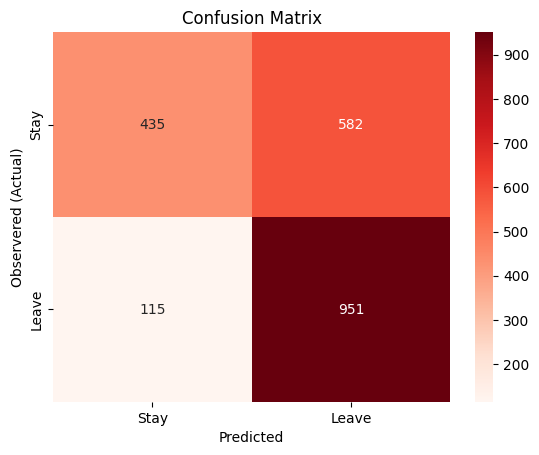

In [54]:
# create a confusion matrix
full_tree_matrix = confusion_matrix(y_test, y_predict)
print(full_tree_matrix)

#Create a heatmap from our confusion matrix
cm = sns.heatmap(full_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])

# Apply the model to a new dataset

In this dataset, we don't know answer.  We need to predict if they will stay or leave

In [55]:
#Import the new data
df_new = pd.read_csv ('megatelco_new_customer_data.csv')


In [56]:
#Preview the new data
df_new.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000
mean,83705.958333,110.208333,28.625000,451115.500000,385.125000,11.62500,5.125000,11275.583333
std,40593.334190,97.638632,29.793219,205207.606472,231.486184,10.66409,4.099973,4947.953779
min,20392.000000,0.000000,0.000000,173038.000000,132.000000,0.00000,1.000000,3239.000000
25%,46900.000000,0.000000,0.000000,263864.000000,203.750000,1.00000,2.000000,8620.500000
50%,90135.500000,112.000000,17.500000,443579.000000,338.000000,7.50000,4.000000,11261.500000
75%,120707.500000,197.750000,50.750000,594438.500000,416.250000,22.25000,9.000000,14307.500000
max,143929.000000,252.000000,87.000000,853464.000000,888.000000,29.00000,14.000000,19570.000000


In [57]:
#delete rows with outlier data; put it in a new dataframe
df_clean_new = df_new[(df_new['house'] > 0) & (df_new['income'] > 0) & (df_new['handset_price'] < 1000)]

#delete any rows with missing values in the clean dataframe
df_clean_new = df_clean_new.dropna()

#standardize attributes
df_clean_new.loc[df_clean_new['college'] == 'one', 'college'] = "1"
df_clean_new.loc[df_clean_new['college'] == 'zero', 'college'] = "0"
df_clean_new.loc[df_clean_new['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean_new.loc[df_clean_new['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean_new.loc[df_clean_new['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean_new.loc[df_clean_new['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean_new.loc[df_clean_new['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean_new.loc[df_clean_new['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean_new.loc[df_clean_new['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean_new.loc[df_clean_new['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean_new.loc[df_clean_new['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean_new['college'] = df_clean_new['college'].astype('int')
df_clean_new['reported_satisfaction'] = df_clean_new['reported_satisfaction'].astype('int')
df_clean_new['reported_usage_level'] = df_clean_new['reported_usage_level'].astype('int')
df_clean_new['considering_change_of_plan'] = df_clean_new['considering_change_of_plan'].astype('float')

#There is no "leave" or "leave_flag"

df_clean_new.head(10)




,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,id
0,1,67983,191,0,207208,384,19,14,1,3,0.0,18429
1,1,143929,86,0,222288,402,4,9,1,3,1.0,13530
2,0,23344,252,0,285199,132,20,14,1,3,0.0,9171
3,0,60984,189,0,614200,286,5,9,2,1,1.0,3239
4,0,130903,0,18,576266,819,0,4,1,3,1.0,11815
5,0,85716,202,0,419080,357,26,11,1,3,0.0,15632
6,0,20392,0,0,589705,167,26,10,3,1,0.0,14127
7,0,121711,181,64,468078,769,14,2,1,1,1.0,11963
8,1,23071,222,87,357847,144,14,2,1,2,1.0,9013
9,0,120373,0,6,539948,632,0,4,3,1,0.0,18810


In [58]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x_new = df_clean_new[['income','house','college','handset_price','over_15mins_calls_per_month','average_call_duration','reported_satisfaction','reported_usage_level','considering_change_of_plan']]


## Predict the customers

Use the tree that we created earlier
Take the customers one by one and pass it to the model, or create a mailing by passing a batch

In [59]:
# Use the tree to predict "leave" for the first customer

y_new_predict = full_tree.predict(x_new.iloc[:1])

#Convert it to a dataframe
df_new_predict = pd.DataFrame(y_new_predict)

df_new_predict.head()

,0
0,True


## XGBoost

Refer to this page for information on XGBoost models: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

➡️ Assignment Tasks
- Import XGBoost
- Copy the section of code for the tree fit and evaluation
- Use the training dataframe that has been split
- In the new copy of the code, replace DecisionTreeClassifier with XGBoost
- Compare the accuracy of the two models

In [72]:
#import
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [74]:
#fit tree
full_tree = XGBClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = full_tree.predict(x_test)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:college: category, reported_satisfaction: category, reported_usage_level: category, considering_change_of_plan: category

In [67]:
#display accuracy

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

NameError: name 'predictions' is not defined